<a href="https://colab.research.google.com/github/Faith-Cherotich/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# 1. Loading the dataset
df1 = pd.read_csv("/content/Mall_Customers (1).csv")
df1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df2 = pd.read_excel("/content/Online Retail.xlsx")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# 2. Dataset shape
df1.shape

(200, 5)

In [ ]:
df2.shape

(541909, 8)

In [ ]:
# Column names with dtypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# 3. Count unique values per column and list the top 10 most frequent values in a categorical field
unique_values = df1.nunique()
print(unique_values)

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64


In [ ]:
unique_value = df2.nunique()
print(unique_value)

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [ ]:
# Top 10 most frequent values in a categorical field
categorical_columns = df1.select_dtypes(include="object").columns
for col in categorical_columns:
  print(f"Top 10 most fequent values in {col}:")
  print(df1[col].value_counts().head(10))

Top 10 most fequent values in Genre:
Genre
Female    112
Male       88
Name: count, dtype: int64


In [ ]:
categorical_cols = df2.select_dtypes(include="object").columns
for col in categorical_cols:
  print(f"\nTop 10 most fequent values in {col}:")
  print(df2[col].value_counts().head(10))


Top 10 most fequent values in InvoiceNo:
InvoiceNo
573585    1114
581219     749
581492     731
580729     721
558475     705
579777     687
581217     676
537434     675
580730     662
538071     652
Name: count, dtype: int64

Top 10 most fequent values in StockCode:
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: count, dtype: int64

Top 10 most fequent values in Description:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64

Top 10 most fequent values in C

In [ ]:
# 4. Missing values
df1.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
# 5. Summary Statistics
numeric_cols = df1.select_dtypes(include="number")
num_cols = numeric_cols.drop(columns="CustomerID")
num_cols.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
numeric_cols = df2.select_dtypes(include="number")
num_cols = numeric_cols.drop(columns="CustomerID")
num_cols.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [ ]:
# 6. Convert numeric columns into bins. Show Counts
df1["Age"].describe()

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


In [ ]:
bins = [18, 29, 59, 70]
label = ["Young", "Adult", "Senior"]

df1["AgeBins"] = pd.cut(df1["Age"], bins=bins, labels=label, include_lowest=True)
print(df1[["AgeBins", "Age"]].head(10))

  AgeBins  Age
0   Young   19
1   Young   21
2   Young   20
3   Young   23
4   Adult   31
5   Young   22
6   Adult   35
7   Young   23
8  Senior   64
9   Adult   30


In [ ]:
# Counts by group
df1["AgeBins"].value_counts()

,count
AgeBins,
Adult,125
Young,55
Senior,20


In [ ]:
df2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# 7. Detect and count any unrealistic values
unrealistic_values = df2[df2["Quantity"] <= 0]
count = len(unrealistic_values)
unrealistic_values1 = df2[df2["UnitPrice"] <= 0]
count1 = len(unrealistic_values1)
print(count, count1)

10624 2517


In [ ]:
unrealistic_value_count = (df2["Quantity"]<= 0).sum()
print(unrealistic_value_count)

10624


In [ ]:
unrealistic_values = df2[df2["Quantity"] <= 0].shape[0]
unrealistic_values1 = df2[df2["UnitPrice"] <= 0].shape[0]
print(unrealistic_values, unrealistic_values1)

10624 2517


In [ ]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# 8. Unique customers
df1["CustomerID"].nunique()

200

In [ ]:
df2["CustomerID"].nunique()

4372

In [ ]:
# most common group
most_common = df1["AgeBins"].value_counts()
print(most_common)

AgeBins
Adult     125
Young      55
Senior     20
Name: count, dtype: int64


## DATA CLEANING & FILTERING

In [ ]:
# 9. Remove rows with missing values in a key column
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
df_cleaned = df2.dropna(subset=["CustomerID"])

In [ ]:
# 10. Drop duplicate rows, how many dropped
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 5225


In [ ]:
# Dropping duplicates
df2_cleaned = df_cleaned.drop_duplicates()
df2_cleaned.shape

(401604, 8)

In [ ]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
# 11. Filter out records where age < 18
df1_filtered = df1[df1["Age"] >= 18]
df1_filtered.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeBins
0,1,Male,19,15,39,Young
1,2,Male,21,15,81,Young
2,3,Female,20,16,6,Young
3,4,Female,23,16,77,Young
4,5,Female,31,17,40,Adult


In [ ]:
# 12. New categorical column from numeric data using conditional statements
def group_age(age):
  if age <= 12:
    return "Child"
  elif 12 < age <= 19:
    return "Teen"
  elif 19 < age <= 65:
    return "Adult"
  else:
    return "Senior citizen"

df1_filtered["AgeGroup"] = df1["Age"].apply(group_age)
df1_filtered.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeBins,AgeGroup
0,1,Male,19,15,39,Young,Teen
1,2,Male,21,15,81,Young,Adult
2,3,Female,20,16,6,Young,Adult
3,4,Female,23,16,77,Young,Adult
4,5,Female,31,17,40,Adult,Adult


In [ ]:
df2_cleaned.shape

(401604, 8)

In [ ]:
df2_cleaned.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# 13. Replace missing values in a numeric column with mean
# Missing values in quantity column
print("Missing Values:", df2_cleaned["Quantity"].isnull().sum())

# Replacing missing values with mean
df2_cleaned["Quantity"].fillna(df2_cleaned["Quantity"].mean())

print("Missing values after replacement:", df2_cleaned["Quantity"].isnull().sum())

Missing Values: 0
Missing values after replacement: 0


In [ ]:
df2_cleaned[["Quantity", "UnitPrice"]].isnull().sum()

,0
Quantity,0
UnitPrice,0


In [ ]:
df1_filtered[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].isnull().sum()

,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
# 14. Bucket customers into categories based on quantiles (e.g spending level)
labels = ["Low", "Low Mid", "Upper Mid", "High"]
df1_filtered["SpendingLevel"] = pd.qcut(df1_filtered["Spending Score (1-100)"], 4, labels=labels)
df1_filtered.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeBins,AgeGroup,SpendingLevel
190,191,Female,34,103,23,Adult,Adult,Low
191,192,Female,32,103,69,Adult,Adult,Upper Mid
192,193,Male,33,113,8,Adult,Adult,Low
193,194,Female,38,113,91,Adult,Adult,High
194,195,Female,47,120,16,Adult,Adult,Low
195,196,Female,35,120,79,Adult,Adult,High
196,197,Female,45,126,28,Adult,Adult,Low
197,198,Male,32,126,74,Adult,Adult,High
198,199,Male,32,137,18,Adult,Adult,Low
199,200,Male,30,137,83,Adult,Adult,High


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 15. Explain and apply feature scaling to numeric features
num_cols = df1_filtered[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler =StandardScaler()
num_scaled = scaler.fit_transform(num_cols)

## Part C: Aggregation & feature engineering

In [ ]:
df1_filtered.rename(columns={"Genre": "Gender"}, inplace=True)
df1_filtered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeBins,AgeGroup,SpendingLevel
0,1,Male,19,15,39,Young,Teen,Low Mid
1,2,Male,21,15,81,Young,Adult,High
2,3,Female,20,16,6,Young,Adult,Low
3,4,Female,23,16,77,Young,Adult,High
4,5,Female,31,17,40,Adult,Adult,Low Mid


In [ ]:
# 16.Average income by gender
df1_filtered.groupby("Gender")["Annual Income (k$)"].mean()

,Annual Income (k$)
Gender,
Female,59.250000
Male,62.227273


In [ ]:
# 17. Max, min, and mean for numeric columns per group
numeric_cols = df1_filtered.select_dtypes(include="number").columns
grouped_stats = df1_filtered.groupby("AgeBins")[numeric_cols].agg(['max', 'min', 'mean'])
print(grouped_stats)

        CustomerID                 Age                Annual Income (k$)      \
               max min        mean max min       mean                max min   
AgeBins                                                                        
Young          188   1   84.381818  29  18  23.181818                101  15   
Adult          200   5  112.024000  59  30  41.456000                137  17   
Senior         117   9   72.800000  70  60  65.650000                 65  19   

                   Spending Score (1-100)                 
              mean                    max min       mean  
AgeBins                                                   
Young    52.545455                     97   5  58.581818  
Adult    65.936000                     99   1  47.664000  
Senior   49.000000                     59   3  43.000000  


/tmp/ipython-input-1831394893.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = df1_filtered.groupby("AgeBins")[numeric_cols].agg(['max', 'min', 'mean'])


In [ ]:
# 18. New ratio feature, income to age
df1_filtered["Income_to_Age_Ratio"] = df1_filtered["Annual Income (k$)"]/df1_filtered["Age"]
print(df1_filtered.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

  AgeBins AgeGroup SpendingLevel  Income_to_Age_Ratio  
0   Young     Teen       Low Mid             0.789474  
1   Young    Adult          High             0.714286  
2   Young    Adult           Low             0.800000  
3   Young    Adult          High             0.695652  
4   Adult    Adult       Low Mid             0.548387  


In [ ]:
# 19. Flag "High value" customers based on income and spending greater than average
average_income = df1_filtered["Annual Income (k$)"].mean()
average_spending = df1_filtered["Spending Score (1-100)"].mean()

df1_filtered["HighValueCustomers"] = (df1_filtered["Annual Income (k$)"] > average_income) & (df1_filtered["Spending Score (1-100)"] > average_spending)
df1_filtered.tail(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeBins,AgeGroup,SpendingLevel,Income_to_Age_Ratio,HighValueCustomers
180,181,Female,37,97,32,Adult,Adult,Low,2.621622,False
181,182,Female,32,97,86,Adult,Adult,High,3.031250,True
182,183,Male,46,98,15,Adult,Adult,Low,2.130435,False
183,184,Female,29,98,88,Young,Adult,High,3.379310,True
184,185,Female,41,99,39,Adult,Adult,Low Mid,2.414634,False
185,186,Male,30,99,97,Adult,Adult,High,3.300000,True
186,187,Female,54,101,24,Adult,Adult,Low,1.870370,False
187,188,Male,28,101,68,Young,Adult,Upper Mid,3.607143,True
188,189,Female,41,103,17,Adult,Adult,Low,2.512195,False
189,190,Female,36,103,85,Adult,Adult,High,2.861111,True


In [ ]:
# 20. Compute correlation between numeric features
num_cols = df1_filtered[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
corr_matrix = num_cols.corr()
print(corr_matrix)


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


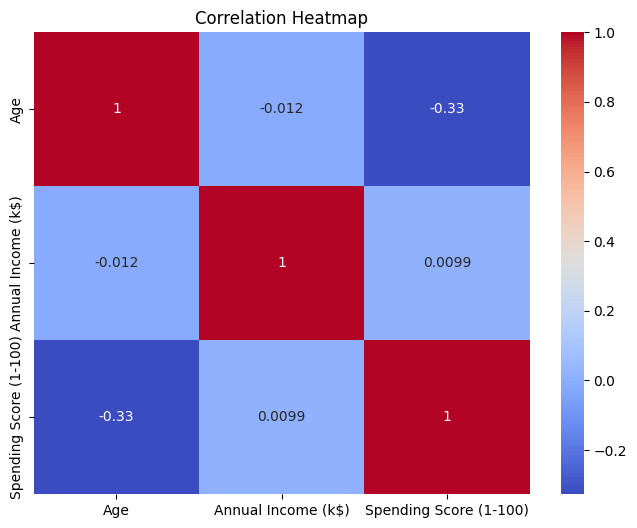

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# 21. Gender with higher average spending score
df1_filtered.groupby('Gender')["Spending Score (1-100)"].mean()

,Spending Score (1-100)
Gender,
Female,51.526786
Male,48.511364


In [ ]:
# 22. Pivot table by age group and gender for average spending
pivot_table = pd.pivot_table(df1_filtered, values="Spending Score (1-100)", index="AgeGroup", columns="Gender", aggfunc="mean")
print(pivot_table)

Gender             Female       Male
AgeGroup                            
Adult           51.561905  49.309859
Senior citizen  51.250000  45.250000
Teen            50.666667  45.111111


## Part D: Visualization & group exploration

In [ ]:
df1_filtered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeBins,AgeGroup,SpendingLevel,Income_to_Age_Ratio,HighValueCustomers
0,1,Male,19,15,39,Young,Teen,Low Mid,0.789474,False
1,2,Male,21,15,81,Young,Adult,High,0.714286,False
2,3,Female,20,16,6,Young,Adult,Low,0.800000,False
3,4,Female,23,16,77,Young,Adult,High,0.695652,False
4,5,Female,31,17,40,Adult,Adult,Low Mid,0.548387,False


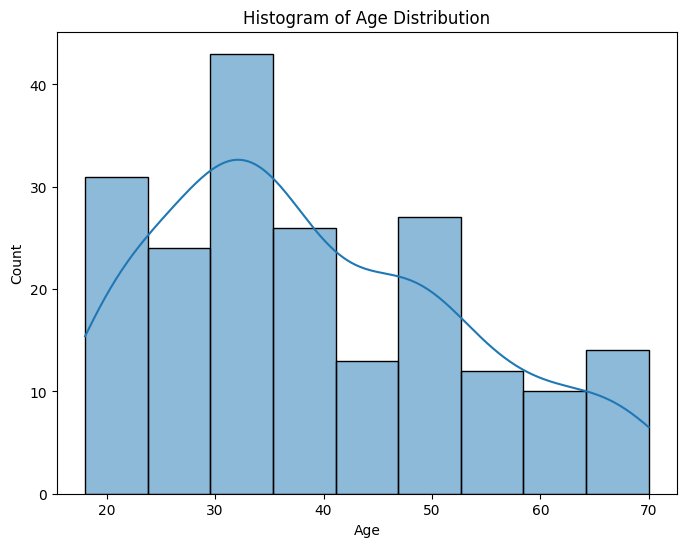

In [ ]:
# 23. Histogram of age distribution
plt.figure(figsize=(8,6))
sns.histplot(data=df1_filtered, x="Age", kde=True)
plt.title("Histogram of Age Distribution")
plt.show()

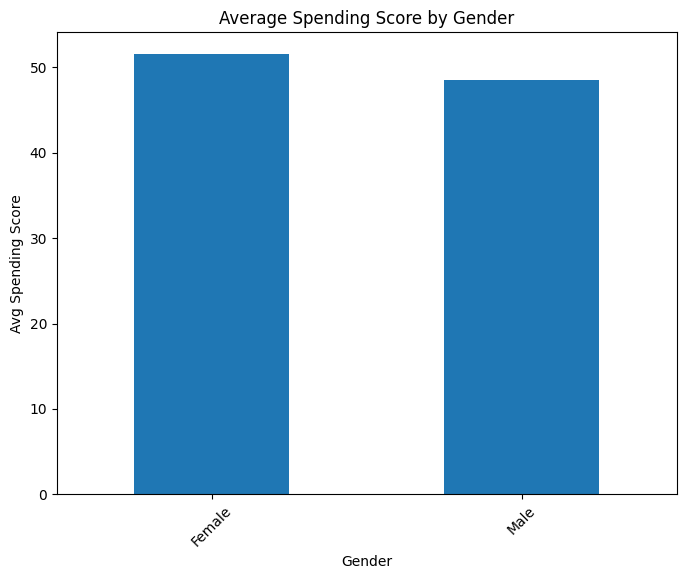

In [ ]:
# 24. Barplot of average spending score by gender
avg_spending = df1_filtered.groupby("Gender")["Spending Score (1-100)"].mean()
plt.figure(figsize=(8,6))
avg_spending.plot(kind="bar")
plt.title("Average Spending Score by Gender")
plt.ylabel("Avg Spending Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(avg_spending)

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64


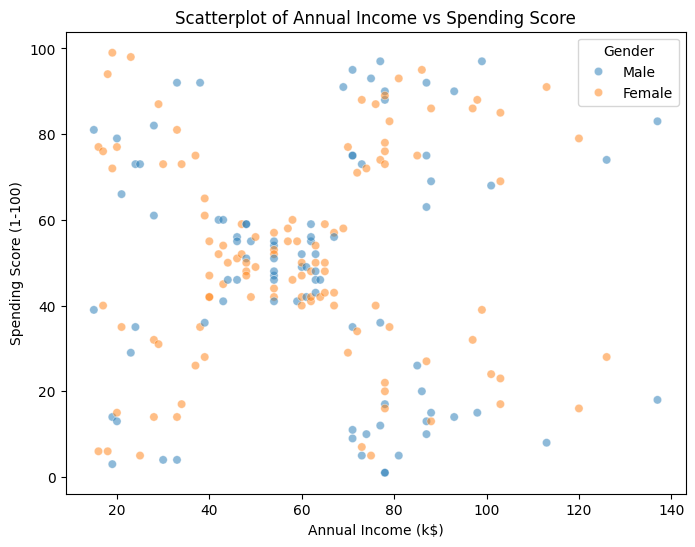

In [ ]:
# 25. Scatterplot of Annual Income vs Spending Score
plt.figure(figsize=(8,6))
sns.scatterplot(data=df1_filtered, x="Annual Income (k$)", y="Spending Score (1-100)", alpha=0.5, hue=df1_filtered["Gender"])
plt.title("Scatterplot of Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

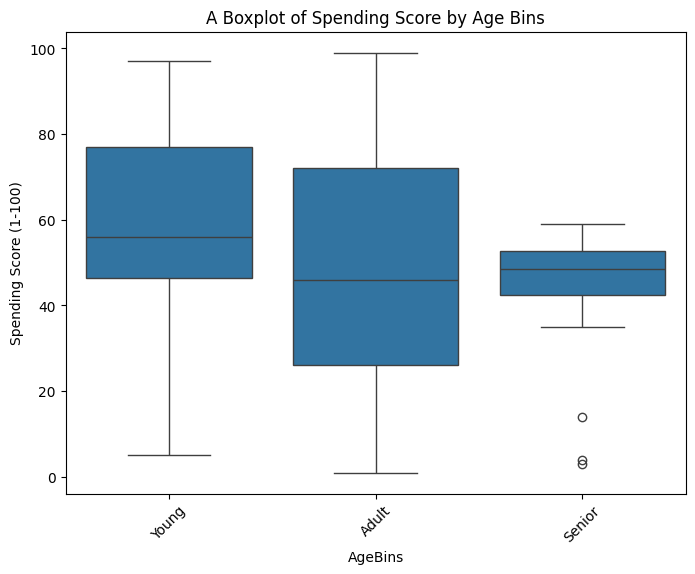

In [ ]:
# 26. Boxplot of spending score grouped by age bins
plt.figure(figsize=(8,6))
sns.boxplot(data=df1_filtered, x="AgeBins", y="Spending Score (1-100)")
plt.title("A Boxplot of Spending Score by Age Bins")
plt.xticks(rotation=45)
plt.show()

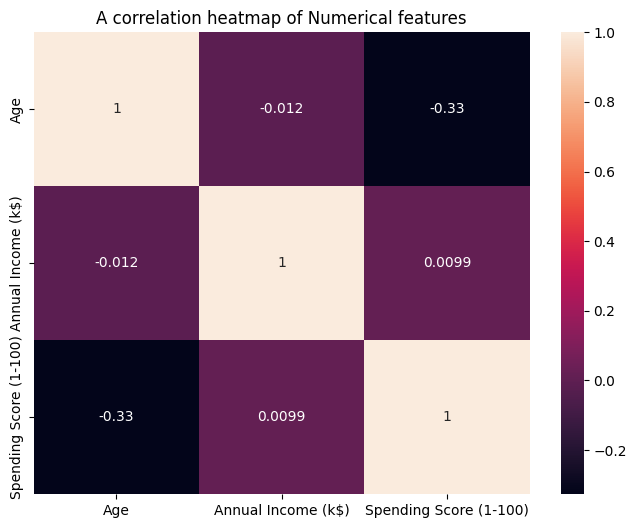

In [ ]:
# 27. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True)
plt.title("A correlation heatmap of Numerical features")
plt.show()

## Part E: Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df1_filtered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeBins,AgeGroup,SpendingLevel,Income_to_Age_Ratio,HighValueCustomers
0,1,Male,19,15,39,Young,Teen,Low Mid,0.789474,False
1,2,Male,21,15,81,Young,Adult,High,0.714286,False
2,3,Female,20,16,6,Young,Adult,Low,0.800000,False
3,4,Female,23,16,77,Young,Adult,High,0.695652,False
4,5,Female,31,17,40,Adult,Adult,Low Mid,0.548387,False


In [ ]:
# 28. Run PCA on standardized income and spending features and plot explained variance
num_features = df1_filtered[["Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(num_features)

In [ ]:
pca = PCA()
pca_1 = pca.fit_transform(scaled_features)

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.50495142 0.49504858]


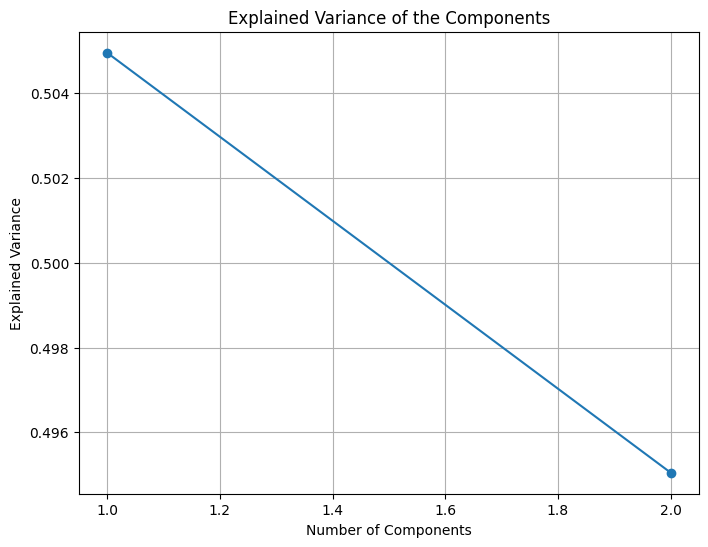

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker="o")
plt.title("Explained Variance of the Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

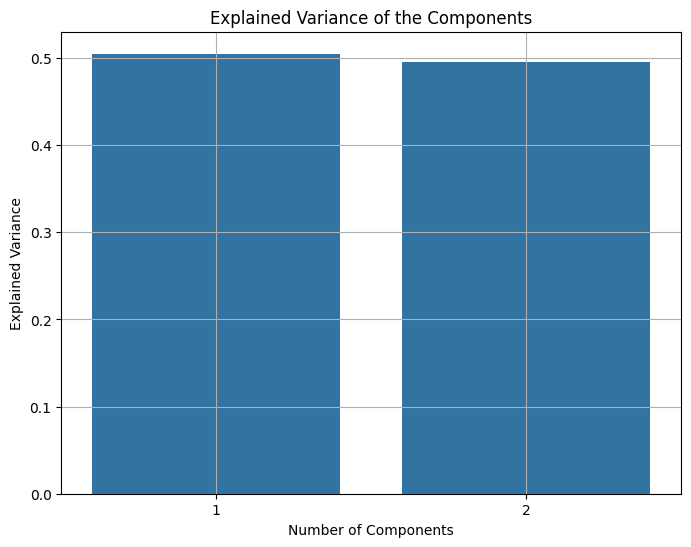

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=range(1, len(explained_variance)+1), y=explained_variance)
plt.title("Explained Variance of the Components")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

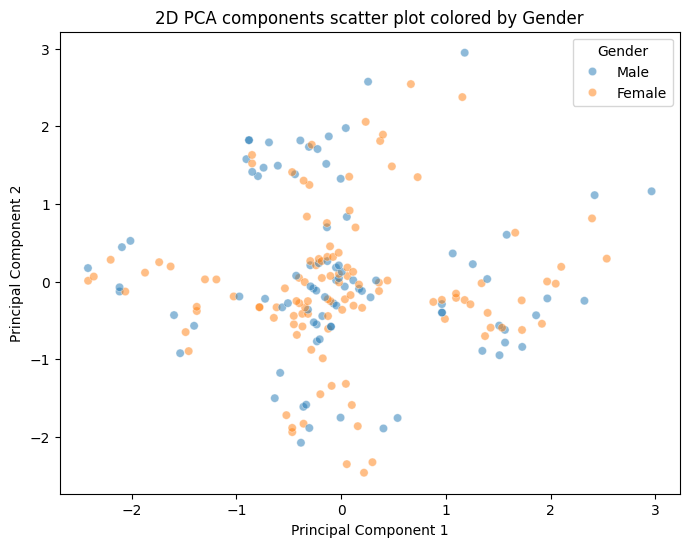

In [ ]:
# 29. Plot 2D PCA components scatter colored by a category (e.g gender)
pca_df = pd.DataFrame(pca_1, columns=["PC1", "PC2"])
pca_df["Gender"] = df1_filtered["Gender"].values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Gender", alpha=0.5)
plt.title("2D PCA components scatter plot colored by Gender")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
# 30. Run t-SNE and plot the 2D embedding
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

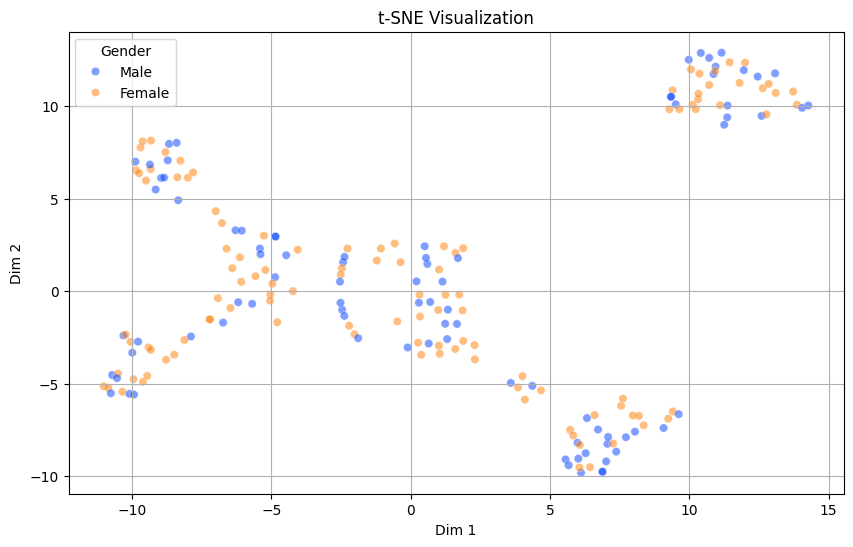

In [ ]:
# Plot
tsne_df=pd.DataFrame(data=tsne_result)
plt.figure(figsize=(10,6))
sns.scatterplot(data=tsne_df, x=tsne_result[:, 0], y=tsne_result[:, 1], alpha=0.5, hue=df1_filtered["Gender"], palette="bright")
plt.title("t-SNE Visualization")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

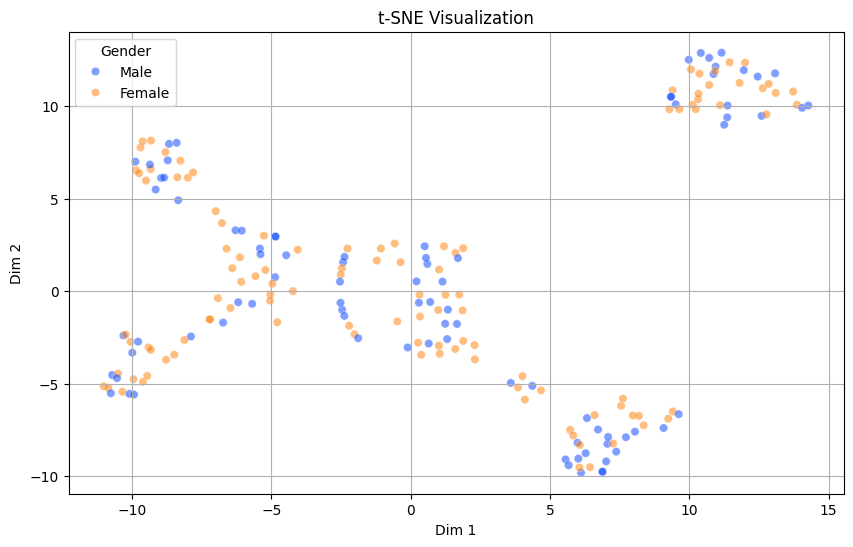

In [ ]:
# Plot
tsne_df=pd.DataFrame(data=tsne_result, columns=("Dim_1", "Dim_2"))
plt.figure(figsize=(10,6))
sns.scatterplot(data=tsne_df, x="Dim_1", y="Dim_2", alpha=0.5, hue=df1_filtered["Gender"], palette="bright")
plt.title("t-SNE Visualization")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

In [ ]:
# 31. Compare PCA and t-SNE plots, which shows clearer clusters
# t-SNE shows tighter clusters

## Part F: Clustering and evaluation

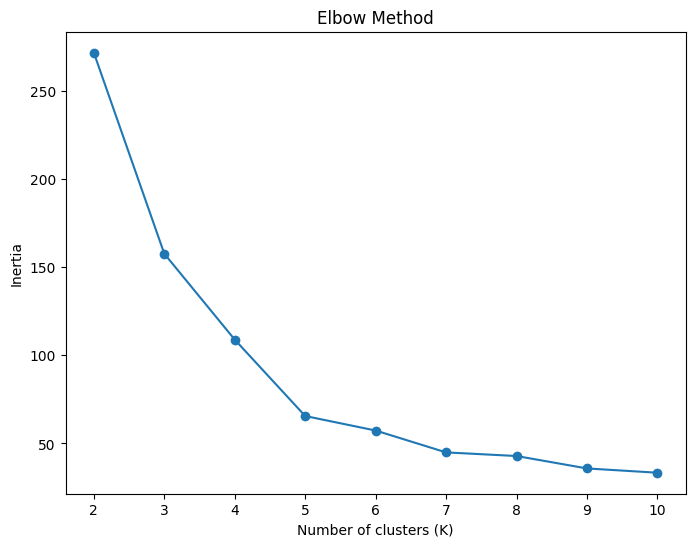

In [ ]:
# 32. Run k-means for k=2...10 on standardized fetures and plot the elbow curve
from sklearn.cluster import KMeans
inertias = []
K_range = range(2, 11)
for k in K_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_features)
  inertias.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [ ]:
# 33. Compute silhouette score for each k and identify the best k
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertias = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_features)
  inertias.append(kmeans.inertia_)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_scores.append(score)
  print("Silhouette Score:", score)

best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print("\nBest k:", best_k)

Silhouette Score: 0.359860319067961
Silhouette Score: 0.46658474419000145
Silhouette Score: 0.4939069237513199
Silhouette Score: 0.5546571631111091
Silhouette Score: 0.5229726204590636
Silhouette Score: 0.5317107324040978
Silhouette Score: 0.4561259611271841
Silhouette Score: 0.4424465594467958
Silhouette Score: 0.45416554630102807

Best k: 5


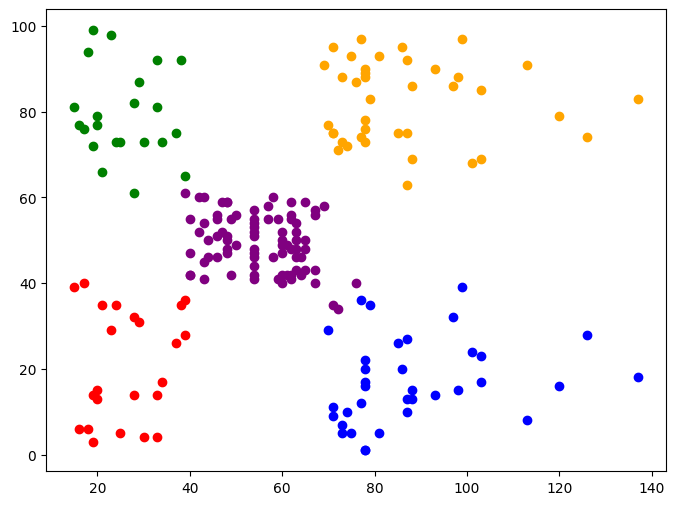

In [ ]:
# 34. Plot clusters for each chosen k using a scatter plot
best_k = 5
kmeans = KMeans(n_clusters=best_k, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df1_filtered["Cluster"] = clusters

# Plotting
plt.figure(figsize=(8,6))
colors = ['purple', 'orange', 'green', 'blue', 'red']
for i in range(best_k):
    plt.scatter(df1_filtered['Annual Income (k$)'][df1_filtered['Cluster'] == i],
                df1_filtered['Spending Score (1-100)'][df1_filtered['Cluster'] == i],
                label=f'Cluster {i+1}',
                color=colors[i])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Genre                   200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
 5   AgeBins                 200 non-null    category
dtypes: category(1), int64(4), object(1)
memory usage: 8.3+ KB


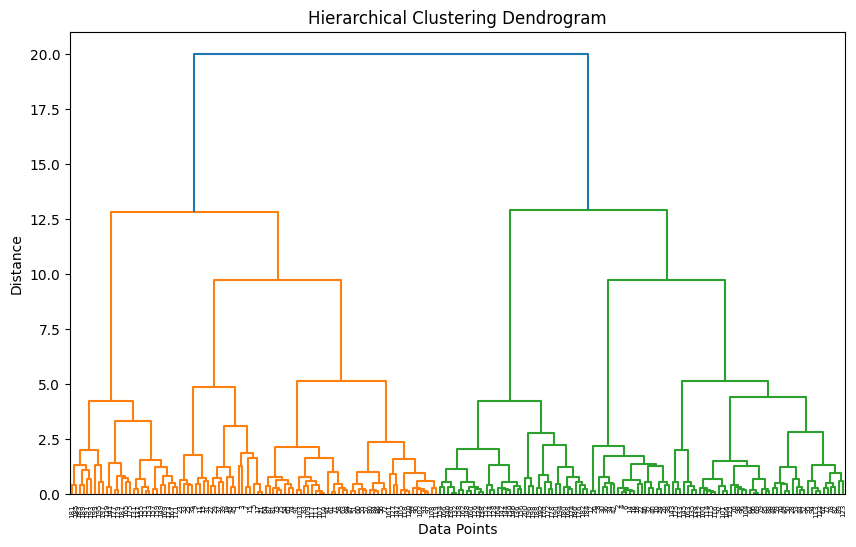

In [ ]:
# 35. Run hierarchical clustering and visualize a dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
data =df1_filtered[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
linked = linkage(scaled_data, method="ward")

# Plotting dendrogram
plt.figure(figsize=(10,6))
dendrogram(linked, labels=range(1, len(scaled_data)+1), orientation="top", distance_sort="ascending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

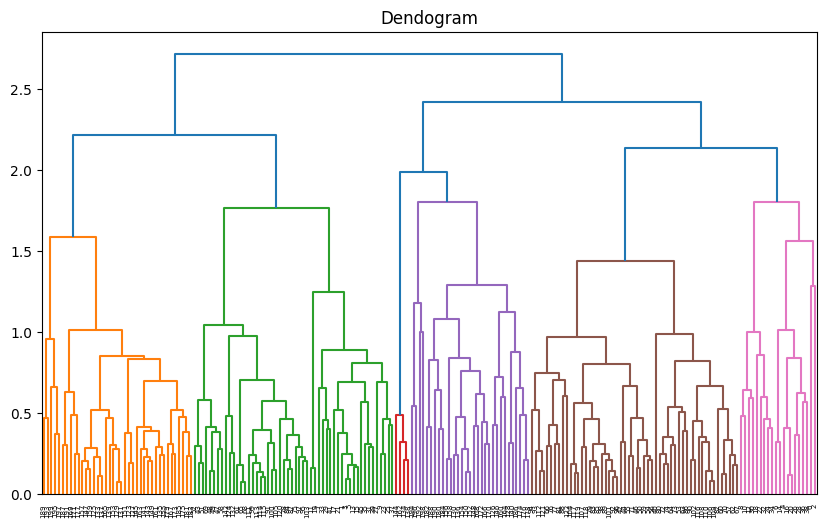

In [ ]:
# 36. Cut the dendogram at k clusters and compare with k-means
# max_d = cut-off/threshhold value
from scipy.cluster import hierarchy
k=5
Z = hierarchy.linkage(scaled_data, method="average")
plt.figure(figsize=(10,6))
plt.title("Dendogram")
dendogram=hierarchy.dendrogram(Z)
plt.axhline(y=k, c="k")

In [ ]:
x = df1_filtered.select_dtypes(include="number").columns
print(x)

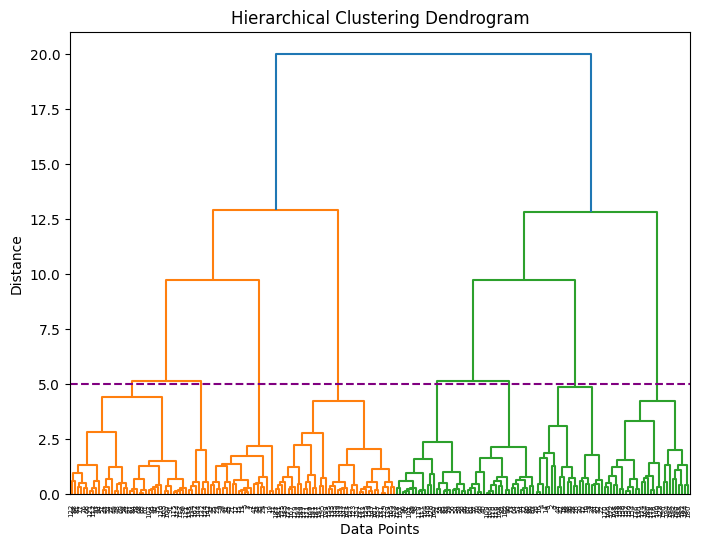

In [ ]:
from scipy.cluster.hierarchy import fcluster
linked_1 = linkage(scaled_data, method="ward")
max_d = 5
labels = fcluster(linked_1, 5, criterion="maxclust")

plt.figure(figsize=(8,6))
dendrogram(linked_1, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.axhline(y=max_d, color="purple", linestyle="--")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [ ]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Gender                  200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
 5   AgeBins                 200 non-null    category
 6   AgeGroup                200 non-null    object  
 7   SpendingLevel           200 non-null    category
 8   Income_to_Age_Ratio     200 non-null    float64 
 9   HighValueCustomers      200 non-null    bool    
 10  Cluster                 200 non-null    int32   
dtypes: bool(1), category(2), float64(1), int32(1), int64(4), object(2)
memory usage: 12.8+ KB


In [ ]:
data = pd.DataFrame(scaler.fit_transform(df1_filtered[["Spending Score (1-100)", "Annual Income (k$)"]]), columns=["Spending Score (1-100)", "Annual Income (k$)"])

In [ ]:
data["Age"] = df1_filtered["Age"]

In [ ]:
data["Cluster"] = clusters

In [ ]:
data

,Spending Score (1-100),Annual Income (k$),Age,Cluster
0,-0.434801,-1.738999,19,4
1,1.195704,-1.738999,21,2
2,-1.715913,-1.700830,20,4
3,1.040418,-1.700830,23,2
4,-0.395980,-1.662660,31,4
...,...,...,...,...
195,1.118061,2.268791,35,1
196,-0.861839,2.497807,45,3
197,0.923953,2.497807,32,1
198,-1.250054,2.917671,32,3


In [ ]:
# 37. Profile each cluster: average age, income, spending score
cluster_profile = data.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_profile)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           -0.200913               -0.026456
1        32.692308            0.991583                1.239503
2        25.272727           -1.329545                1.132178
3        41.114286            1.055003               -1.284439
4        45.217391           -1.307519               -1.136965


In [ ]:
# 38. Check cluster sizes, are some clusters too small
cluster_size = data["Cluster"].value_counts(ascending=False)
print(cluster_size)

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


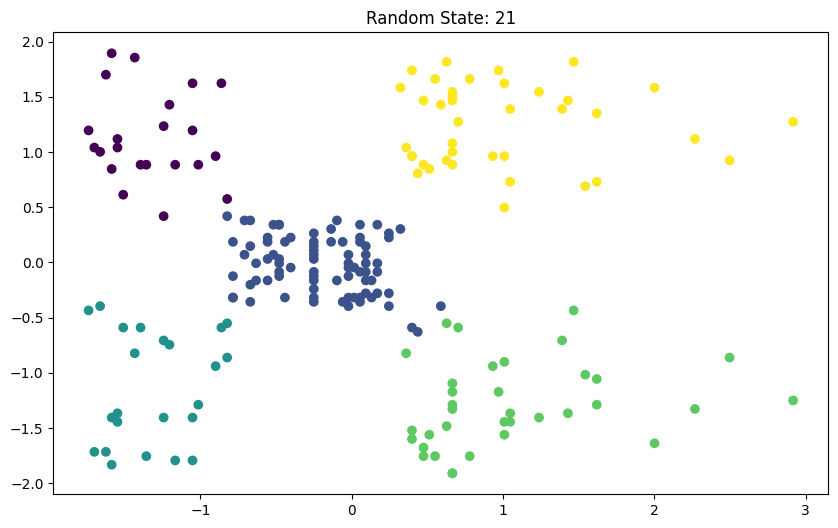

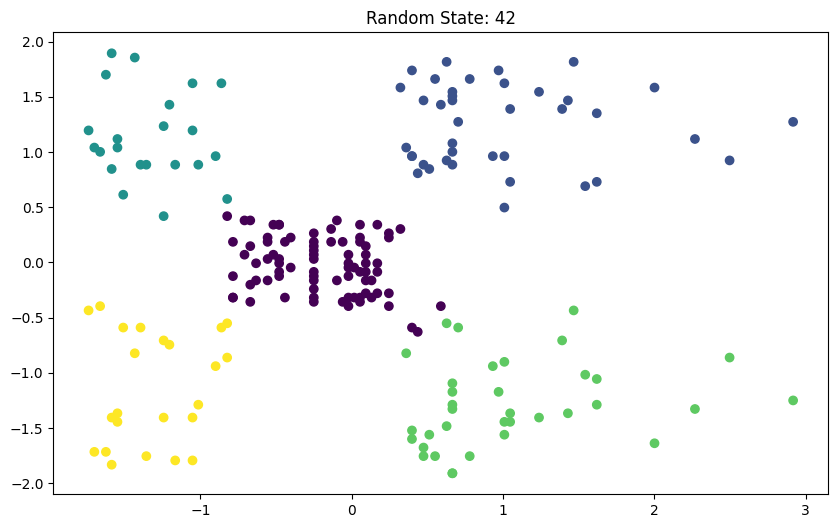

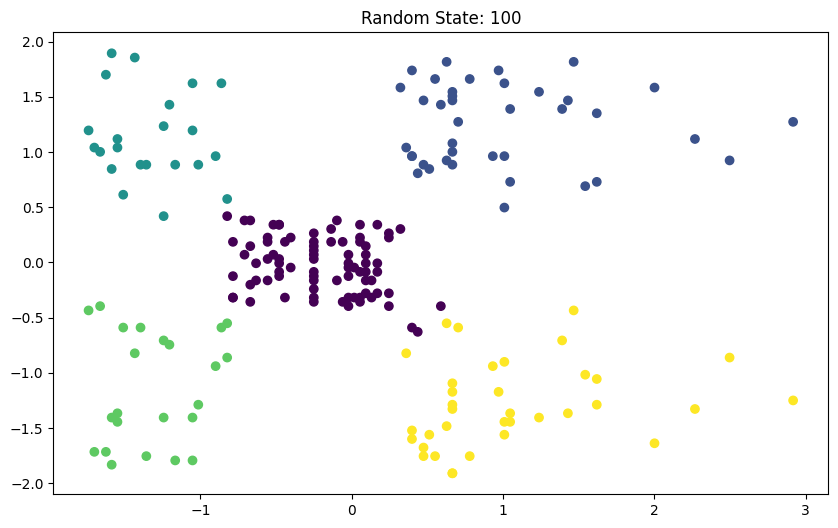

In [ ]:
# 39. Run k-means with different random states and see if cluster assignments change
random_states = [21, 42, 100]
for item in random_states:
  kmeans = KMeans(n_clusters=5, random_state=item, init="k-means++")
  labels = kmeans.fit_predict(num_features)

  # Plotting
  plt.figure(figsize=(10,6))
  plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"], c=labels, cmap="viridis")
  plt.title(f"Random State: {item}")

plt.show()

In [ ]:
# 40. Export the dataset with cluster labels to CSV
df1_filtered.to_csv("customer_segmentation.csv", index=False)

In [ ]:
df_check=pd.read_csv("/content/customer_segmentation.csv")

In [ ]:
df_check.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),AgeBins,AgeGroup,SpendingLevel,Income_to_Age_Ratio,HighValueCustomers,Cluster
0,1,Male,19,15,39,Young,Teen,Low Mid,0.789474,False,4
1,2,Male,21,15,81,Young,Adult,High,0.714286,False,2
2,3,Female,20,16,6,Young,Adult,Low,0.800000,False,4
3,4,Female,23,16,77,Young,Adult,High,0.695652,False,2
4,5,Female,31,17,40,Adult,Adult,Low Mid,0.548387,False,4
